In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

In [2]:
X, y = datasets.make_blobs(n_samples=100, centers=2, random_state=6, cluster_std=1.5)

In [3]:
# Modelo SVM
modelo_svm = SVC(kernel='linear')
modelo_svm.fit(X, y)

SVC(kernel='linear')

In [6]:
# Visualizar los datos y la frontera de decisión
def graficar_frontera(modelo, X, y):
    plt.figure(figsize=(8,6))

    # Puntos de datos
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=30)

    # Malla para graficar la frontera
    eje_x = np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 100)
    eje_y = np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, 100)
    xx, yy = np.meshgrid(eje_x, eje_y)
    puntos = np.c_[xx.ravel(), yy.ravel()]
    Z = modelo.decision_function(puntos).reshape(xx.shape)

    # Frontera y margenes
    plt.contour(xx, yy, Z, levels=[-1, 0, 1], colors=['red', 'black', 'blue'], linestyles=['--', '-', '--'])

    # Vectores de soporte
    plt.scatter(modelo.support_vectors_[:, 0], modelo.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k', label='Vectores de soporte')

    plt.title("Clasificación con SVM (kernel lineal)")
    plt.xlabel("Característica 1")
    plt.ylabel("Característica 2")
    plt.legend()
    plt.grid(True)
    plt.show()

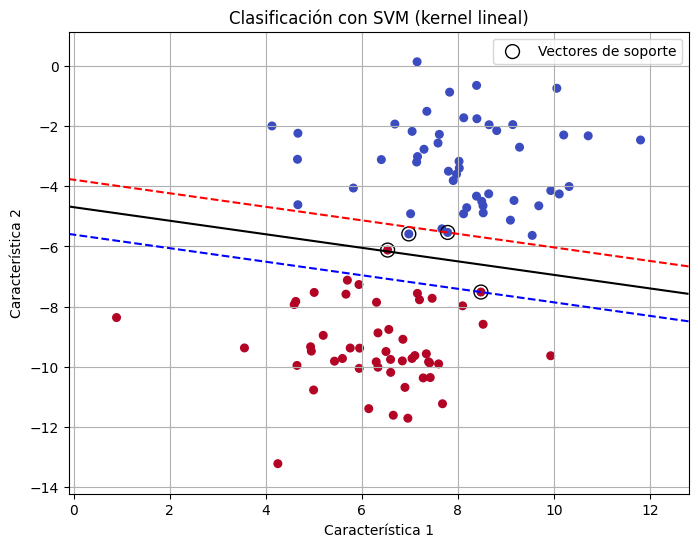

In [7]:
graficar_frontera(modelo_svm, X, y)